#                                                               **Temperatures of INDIA**

**Introduction:**

Welcome to this Kaggle notebook where we'll explore the fascinating world of linear regression in the context of temperature data in India. Temperature plays a crucial role in our daily lives, affecting everything from agriculture to energy consumption, and understanding its patterns can be valuable for a variety of applications. In this notebook, we will delve into a dataset containing historical temperature data for India, collected and maintained by the Indian government.

**Dataset Description:**

The dataset used in this analysis consists of temperature records for India, with recent temperature data available up to 2017. The temperatures are recorded in degrees Celsius, and the values represent the averages across various locations in India. These temperatures offer a comprehensive view of how the climate in India has been evolving over time.

It's worth noting that this dataset is sourced directly from the Indian government website, ensuring its reliability and accuracy. Analyzing this data can provide valuable insights into temperature trends and variations across the Indian subcontinent, allowing us to better understand the country's climate patterns.

**Methodology:**

**Data Preprocessing:** We will start by exploring the dataset, understanding its structure, and cleaning the data if necessary. We will also look at any missing values and handle them appropriately.

**Linear Regression Model:** With a better understanding of the data, we will implement a linear regression model. We will split the data into training and testing sets, fit the model, and evaluate its performance. This model will help us make predictions about future temperature changes in India.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data = pd.read_csv("/kaggle/input/temperatures-of-india/temperatures.csv")


In [3]:
data.isna().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [4]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [5]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [6]:
data.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42,27.95,34.13,32.41,29.69


In [7]:
data.shape

(117, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [9]:
x = data[["YEAR"]]
y = data[["ANNUAL"]]

In [10]:
x

,YEAR
0,1901
1,1902
2,1903
3,1904
4,1905
...,...
112,2013
113,2014
114,2015
115,2016


In [11]:
y

,ANNUAL
0,28.96
1,29.22
2,28.47
3,28.49
4,28.30
...,...
112,29.81
113,29.72
114,29.90
115,31.63


[]

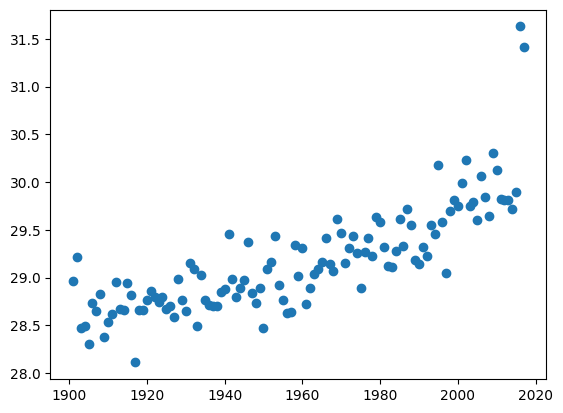

In [12]:
x = data.iloc[:,0:1]
y = data.iloc[:,13:14]

plt.scatter(x,y)
plt.plot()

In [13]:
x_train,x_test, y_train, y_test = train_test_split(x, y,test_size=0.40, random_state=0)
y_test = np.array(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 1)
(47, 1)
(70, 1)
(47, 1)


In [14]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
print(y_pred.shape)

(47, 1)


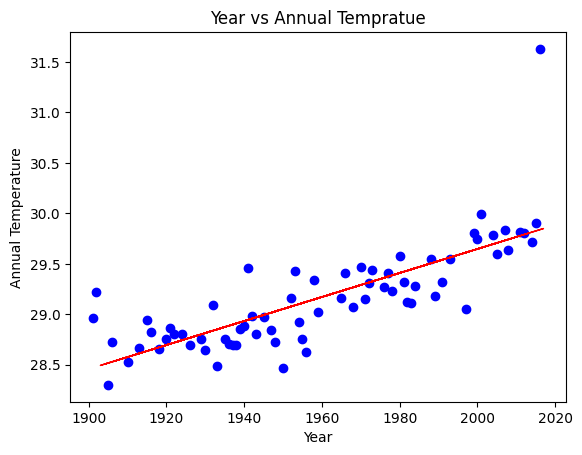

In [16]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=1)
plt.title("Year vs Annual Tempratue")
plt.xlabel("Year")
plt.ylabel("Annual Temperature")
plt.show()

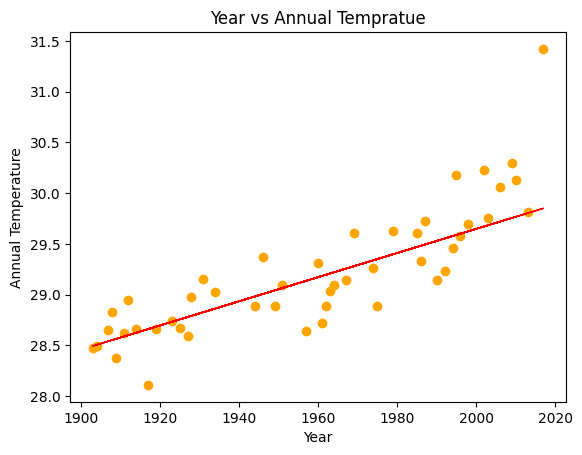

In [17]:
plt.scatter(x_test, y_test, color='orange')
plt.plot(x_test, y_pred, color='red', linewidth=1)
plt.title("Year vs Annual Tempratue")
plt.xlabel("Year")
plt.ylabel("Annual Temperature")
plt.show()

In [18]:
model.coef_

array([[0.01190094]])

In [19]:
model.intercept_

array([5.84557702])

<Axes: xlabel='YEAR', ylabel='ANNUAL'>

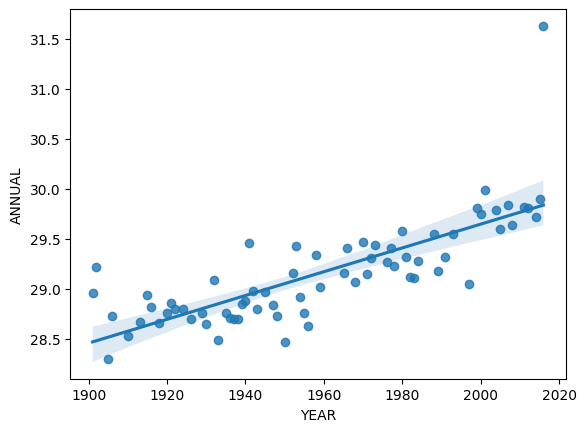

In [20]:
df = data
sns.regplot(data=df,x=x_train,y=y_train,)

<Axes: xlabel='YEAR'>

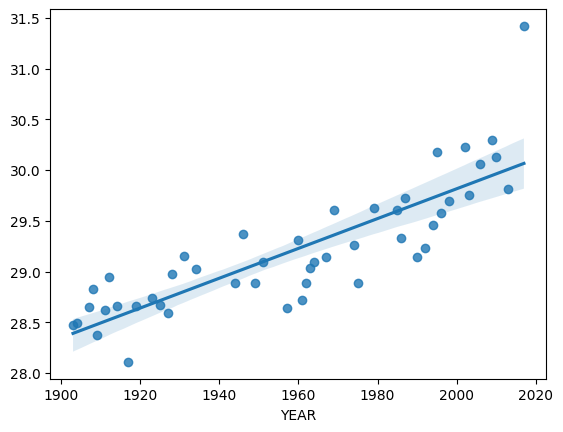

In [21]:
sns.regplot(data=df,x=x_test,y=y_test,)

In [22]:
print(f"MSE:  {mean_squared_error(y_test,y_pred)}")
print(f"MAE:  {mean_absolute_error(y_test,y_pred)}")
print(f"R-Sqaure :  {r2_score(y_test,y_pred)}")

MSE:  0.12739407224025404
MAE:  0.2467987767427756
R-Sqaure :  0.6672373588443201


**Conclusion:**

In this notebook, we've analyzed temperature data in India using linear regression. We started with data preprocessing, which involved cleaning and preparing the dataset for modeling. We then built a linear regression model that provides us with a framework for understanding how temperature changes in India have been influenced by various factors. It also allows us to make forecasts, which can be invaluable for a range of applications, from agriculture planning to climate change mitigation.

We evaluated the performance of our linear regression model using the following metrics:

Mean Squared Error (MSE): 0.1274
Mean Absolute Error (MAE): 0.2468
R-Squared (R²) Score: 0.6672
These metrics provide a quantitative assessment of our model's performance. While our model demonstrates promising performance, it's important to consider the limitations and uncertainties associated with any predictive model. Further research and refinement can help us improve the accuracy and applicability of our predictions.

We hope this revised notebook has been informative and inspiring for your own data analysis and modeling projects. Feel free to explore, modify, and build upon the ideas presented here to gain deeper insights into temperature data or apply similar techniques to other datasets of interest.

Enjoy your journey into the world of data science, and continue to explore the endless possibilities it offers!

GitHub[https://github.com/Neuro-kiran/Temperatures-of-INDIA](http://)

Thank you for visiting
